# Assignment 12 (Naive Bayes) Salary_Data

## Q. 1) Prepare a classification model using Naive Bayes for salary data 

## Data Description:

## age -- age of a person
## workclass	-- A work class is a grouping of work 
## education	-- Education of an individuals	
## maritalstatus -- Marital status of an individulas	
## occupation	 -- occupation of an individuals
## relationship -- 	
## race --  Race of an Individual
## sex --  Gender of an Individual
## capitalgain --  profit received from the sale of an investment	
## capitalloss	-- A decrease in the value of a capital asset
## hoursperweek -- number of hours work per week	
## native -- Native of an individual
## Salary -- salary of an individual

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import model_selection

In [2]:
# Loading Datasets
test_temp_data = pd.read_csv("SalaryData_Test.csv")
train_temp_data = pd.read_csv("SalaryData_Train.csv")

In [3]:
df_temp = test_temp_data.append(train_temp_data)

In [4]:
test_data = test_temp_data.copy()
train_data = train_temp_data.copy()

In [5]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# There are some non numerical data, so storing them as a list
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [8]:
# Using LabelEncoder for converting data
num = LabelEncoder()

In [9]:
for i in str_c:
    train_data[i]= num.fit_transform(train_data[i])
    test_data[i]=num.fit_transform(test_data[i])

In [10]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [11]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [12]:
# Assigning Values of Salary column as 1 and 2, storing these values as dictionary 
mapping = {' >50K': 1, ' <=50K': 2}

In [13]:
train_data = train_data.replace({'Salary': mapping})
test_data = test_data.replace({'Salary': mapping})

In [14]:
df = train_data.append(test_data)

In [15]:
df1 = df.copy()

In [16]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [17]:
df1.shape

(45221, 14)

In [18]:
df1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,10.118463,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,1.752151
std,13.217981,0.958132,3.816992,2.552909,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,2.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,2.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,2.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,2.000000


In [19]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

## Correlation Analysis 

In [20]:
corr = df1.corr()

<AxesSubplot:>

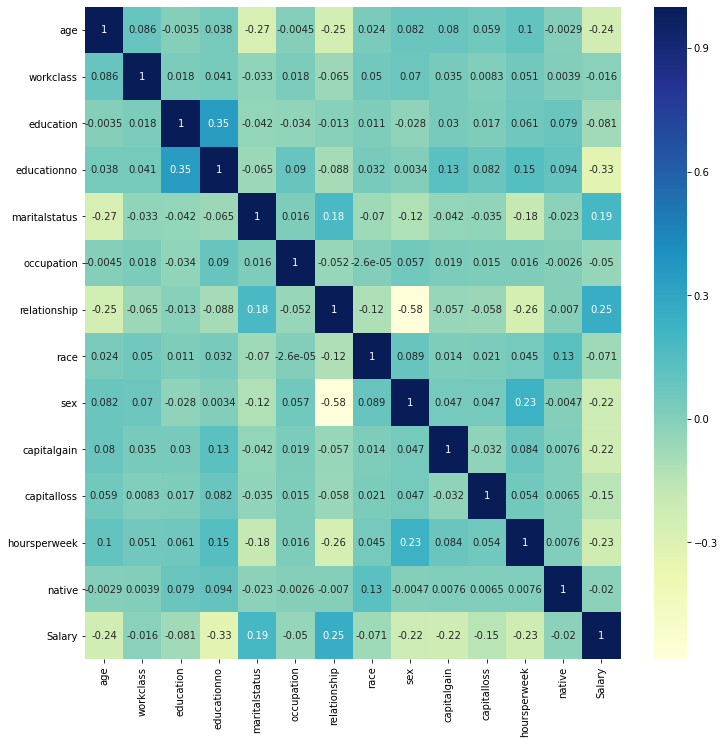

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,cmap='YlGnBu',annot=True)

In [22]:
plt.rcParams["figure.figsize"] = 9,5

Skewness: -0.31062061074424
Kurtosis: 0.6350448194491634


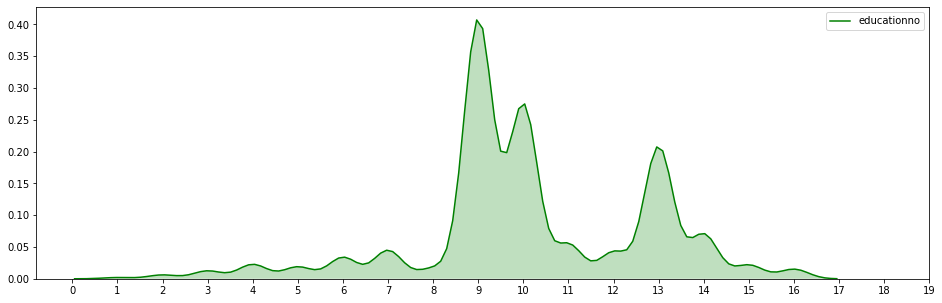

In [23]:
plt.figure(figsize=(16,5))
print("Skewness: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

## The Data is negatively skewed and has low kurtosis value
## Most of people have eduction Number of years of education 8 to 11

In [24]:
df2 = df_temp[df_temp.columns[0:13]]
object_column = df2.select_dtypes(include='object').columns.tolist()

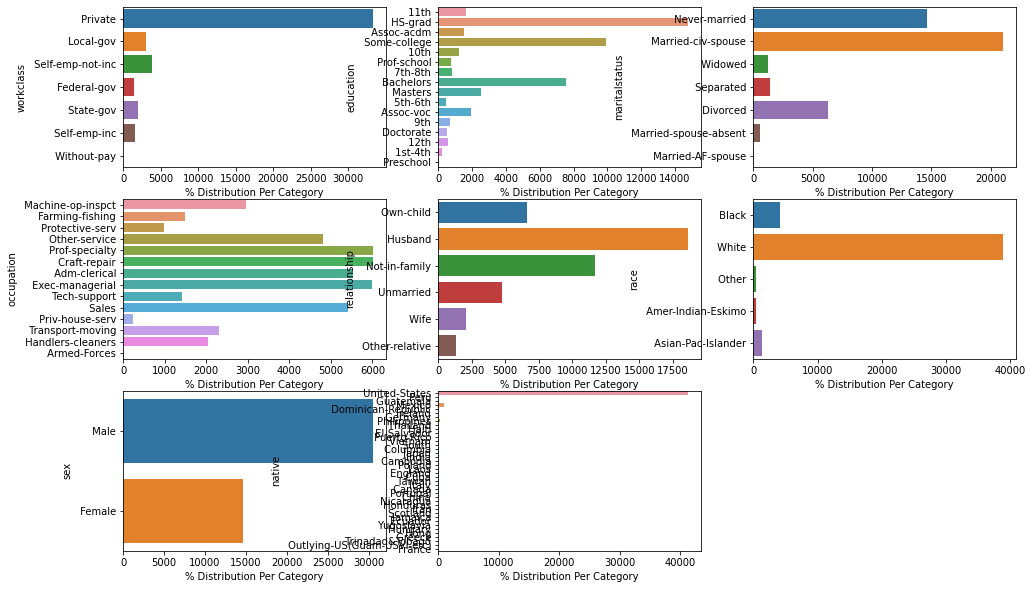

In [25]:
plt.figure(figsize=(16,10))
for i,col in enumerate(object_column,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df2,y=col)
    plt.ylabel(col)
    plt.xlabel('% Distribution Per Category')
plt.show()

## Majority of the workclass is in Private Sector
## Also for education majority of the people have HS graduation or some college degree 

In [26]:
num_columns = df2.select_dtypes(exclude='object').columns.tolist()

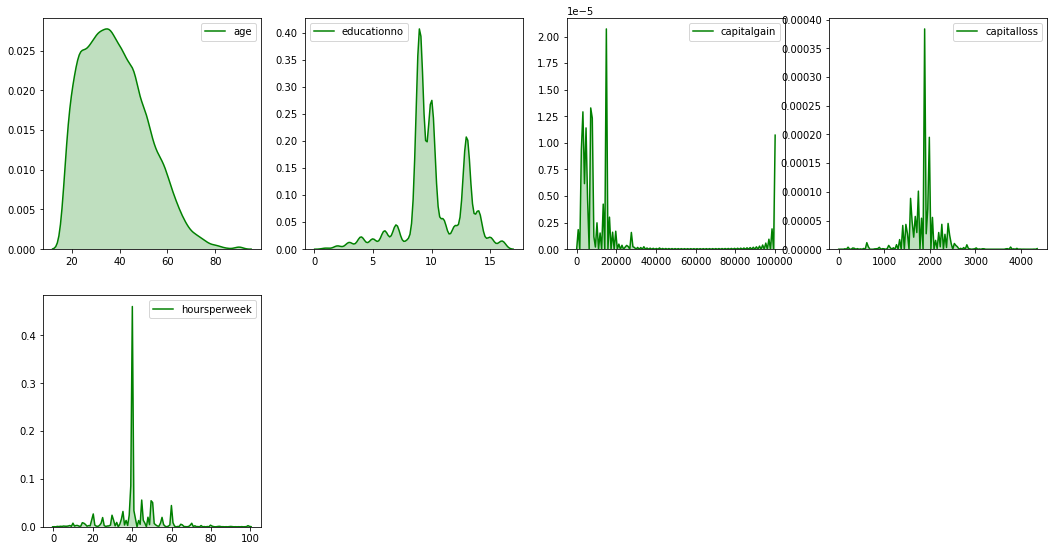

,age,educationno,capitalgain,capitalloss,hoursperweek
Skewness,0.532784,-0.310621,11.788871,4.517536,0.340536
Kurtosis,-0.155931,0.635045,150.147899,19.376085,3.201287


In [27]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['Skewness','Kurtosis'])

## Naive Bayes

In [28]:
x_train = train_data.iloc[:,0:13]
y_train = train_data.iloc[:,13]
x_test = test_data.iloc[:,0:13]
y_test = test_data.iloc[:,13]

## GaussianNB 

In [29]:
gnb_df = GaussianNB()

In [30]:
gnb_df.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
y_pred_gnb_df = gnb_df.predict(x_test)

In [32]:
confusion_matrix(y_test, y_pred_gnb_df)

array([[ 1209,  2491],
       [  601, 10759]], dtype=int64)

In [33]:
pd.crosstab(y_test.values.flatten(),gnb_df)

col_0,"GaussianNB(priors=None, var_smoothing=1e-09)"
row_0,
1,3700
2,11360


In [34]:
print("Accuracy :",np.mean(y_pred_gnb_df == y_test.values.flatten()))

Accuracy : 0.7946879150066402


## MultinomialNB 

In [35]:
mnb = MultinomialNB()

In [36]:
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
y_pred_mnb_df = mnb.predict(x_test)

In [38]:
confusion_matrix(y_test, y_pred_mnb_df)

array([[  780,  2920],
       [  469, 10891]], dtype=int64)

In [39]:
pd.crosstab(y_test.values.flatten(),mnb)

col_0,"MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)"
row_0,
1,3700
2,11360


In [40]:
print("Accuracy :",np.mean(y_pred_mnb_df == y_test.values.flatten()))

Accuracy : 0.7749667994687915


## Conclusion & Cross Validation :-
## GaussianNB Model has a better Accuracy, Thus we will use GaussianNB Classifier
## We will also cross validate the model with other classifiers to get better understanding of which classifier is best suited for our data

In [41]:
seed = 7

In [42]:
models = []
models.append(('LogReg', LogisticRegression()))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [43]:
results = []
names = []
scoring = 'accuracy'

In [44]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LogReg: 0.818773 (0.006430)
LinearDiscriminantAnalysis: 0.810650 (0.008475)
KNN: 0.834455 (0.005149)
CART: 0.808063 (0.005388)
NB: 0.795498 (0.006570)


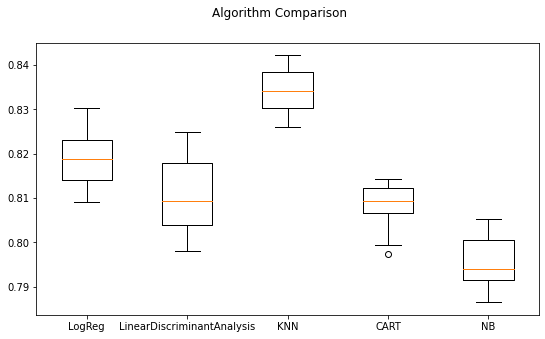

In [45]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## In Comparision KNN has the Best Accuracy 